In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
from lets_plot import *
LetsPlot.setup_html()    

In [2]:
df = pd.read_csv("D:/Data Science for Marketing-I/data/bank-additional-full.csv",sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df['conversion']=df['y'].apply(lambda x:1 if x=='yes' else 0)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [5]:
df['conversion'].value_counts()

conversion
0    36548
1     4640
Name: count, dtype: int64

In [6]:
df['conversion'].sum()/df['conversion'].count()*100

11.265417111780131

In [7]:
df.groupby('conversion')['age'].count()/(df['conversion'].count())*100

conversion
0    88.734583
1    11.265417
Name: age, dtype: float64

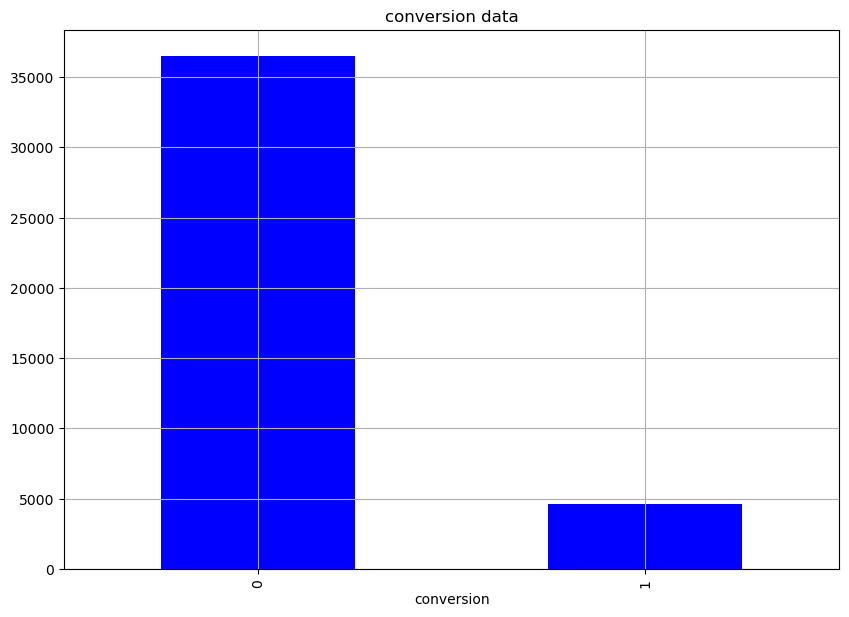

In [8]:
ax = df.groupby('conversion').count()['age'].plot(
    kind='bar',
    color='blue',
    grid=True,
    figsize=(10,7),
    title='conversion data'),
   

In [9]:
pd.DataFrame(df.groupby(by='campaign')['conversion'].sum())

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [10]:
df['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [11]:
campaign_by_conversion=df.groupby('campaign')['conversion'].sum()/df.groupby('campaign')['conversion'].count()*100 

<Axes: xlabel='campaign'>

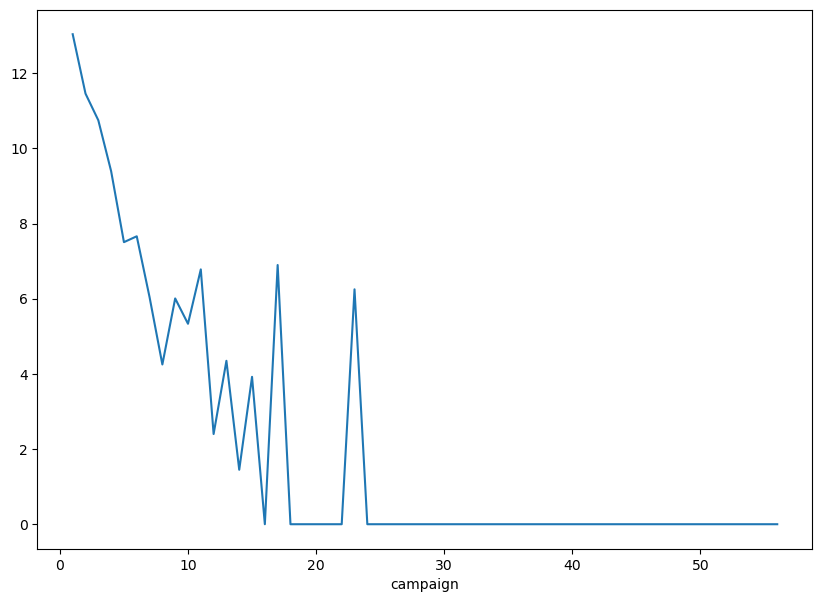

In [12]:
campaign_by_conversion.plot(figsize=(10,7),kind='line')

In [13]:
age_conversion=(df.groupby('age')['conversion'].sum()/df.groupby('age')['conversion'].count()*100)

<Axes: xlabel='age'>

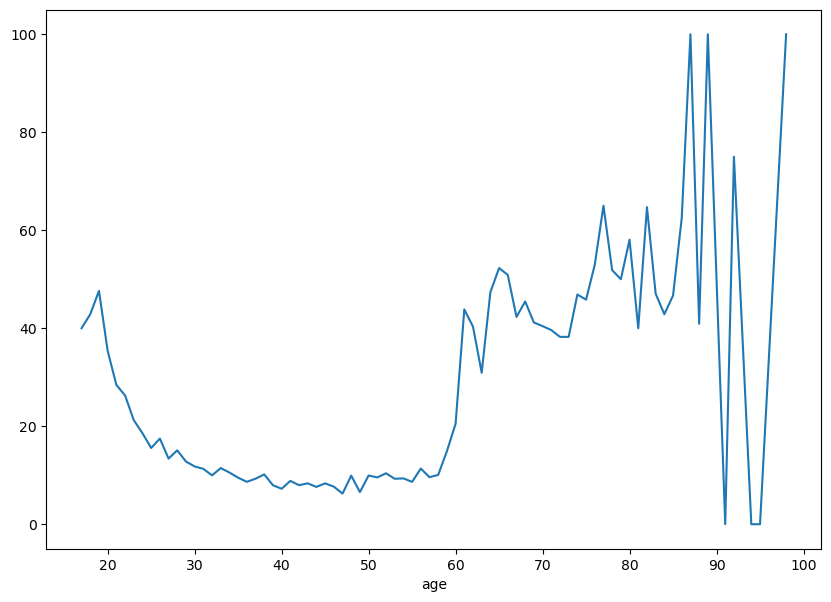

In [14]:
age_conversion.plot(figsize=(10,7),kind='line')

In [15]:
df['age_group']=df['age'].apply(lambda x:'-30' if x<=30 else '31-40' if x<=40 else '41-50' if x<=50 else '51-60' if x<=60 else '60+')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,51-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,51-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,31-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,31-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,60+
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,41-50
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,51-60
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,41-50


In [16]:
pd.DataFrame(df.groupby(by='age_group')['conversion'].sum())

,conversion
age_group,
-30,1124
31-40,1597
41-50,837
51-60,668
60+,414


In [17]:
age_group_conversion=df.groupby('age_group')['conversion'].sum()/df.groupby('age_group')['conversion'].count()*100
age_group_conversion

age_group
-30      15.224164
31-40     9.746720
41-50     8.173828
51-60    10.653907
60+      45.494505
Name: conversion, dtype: float64

<Axes: xlabel='age_group'>

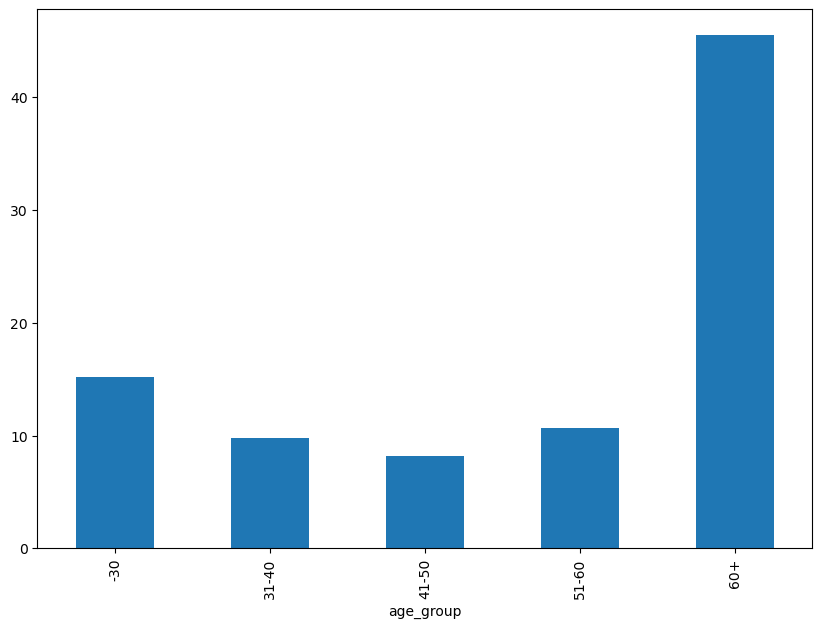

In [18]:
age_group_conversion.plot(figsize=(10,7),kind='bar')

In [19]:
df.groupby('age_group')['age'].count()

age_group
-30       7383
31-40    16385
41-50    10240
51-60     6270
60+        910
Name: age, dtype: int64

In [20]:
marital_conversion=pd.pivot_table(df,index='marital',values='y',columns='conversion',aggfunc='count')
marital_conversion

conversion,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [21]:
marital_conversion.columns=['not conversion','conversion']
marital_conversion

,not conversion,conversion
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


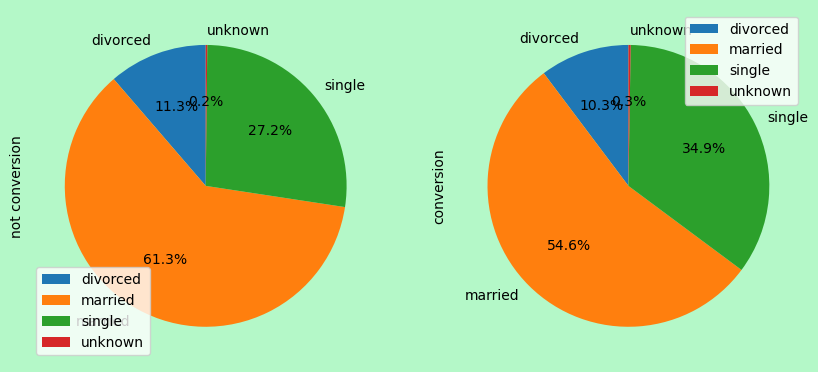

In [22]:
import matplotlib.pyplot as plt

marital_conversion.plot(
    kind='pie',
    figsize=(10, 7),
    subplots=True,
    startangle=90,
    autopct='%1.1f%%'
)

plt.gca().set_facecolor("lightcyan")
plt.gcf().set_facecolor("#b4f8c8")  
plt.show()
